In [1]:
import pandas as pd
import ctranslate2
import sentencepiece as spm
from sacrebleu import sentence_bleu

In [2]:
# path_to_corpus = './Corpora/corpus_df.pkl'
# corpus_df = pd.read_pickle(path_to_corpus)
# path_to_syntethic = '.\Corpora\syhtethic.pkl'
# synthetic_df = pd.read_pickle(path_to_syntethic)

In [3]:
corpus_df

,Dutch_Sentence,English_Sentence,Dutch Sentence Length,English Sentence Length
0,Solidariteitsfonds SOLFA wil gezondheid en zel...,Solidarity Fund SOLFA endeavours to improve he...,7,9
1,"""Veel Afrikaanse vrouwen gaan naar huis met ee...","""Many African women return home with a fistula...",12,12
2,Professor Dirk De Ridder van de Afdeling Urolo...,"Professor Dirk De Ridder, from the urology dep...",24,23
3,Daar is hij vrouwen gaan opereren die door een...,"There he operated on women who, as a result of...",18,15
4,"""Bijna de hele overlevingseconomie in Afrika s...","""Just about the entire survival economy of Afr...",9,11
...,...,...,...,...
995,"""Mijn onderzoek levert nog andere interessante...","""My research has also produced some other inte...",21,20
996,"27,5 procent is van plan om dikwijls te snel t...","27.5 percent are planning to speed often, whil...",22,22
997,Bijna een op drie jongeren antwoordt bovendien...,"Moreover, nearly one in three young people say...",28,27
998,In het kader van haar onderzoek ondervroeg Kat...,"In the context of her research, Kathleen Beull...",30,35


In [4]:
# synthetic_df

In [5]:
translator = ctranslate2.Translator("./nllb-200-600M-int8/", device="cpu")
sp = spm.SentencePieceProcessor("./Labs/flores200_sacrebleu_tokenizer_spm.model")

In [6]:
corpus_df['Translated_Dutch'] = ''
corpus_df['BLEU_score']=0.00
src_lang = 'dutch_Latn'
tgt_lang = 'eng_Latn'

index = 0
for row in corpus_df.iterrows():
    #get the dutch and english sentence from the dataframe
    dutch_sent = str(corpus_df["Dutch_Sentence"][index])
    reference_sentence = str(corpus_df['English_Sentence'][index])

    #pre processing
    source_sentences = [dutch_sent.strip()]
    target_prefix = [[tgt_lang]] * len(source_sentences)

    #encode the stripped dutch sentence
    source_sents_subworded = sp.encode_as_pieces(source_sentences)
    source_sents_subworded = [[src_lang] + sent + ["</s>"] for sent in source_sents_subworded]

    #translate the encoded subword token
    translated_sentence_encoded = translator.translate_batch(source_sents_subworded, batch_type='tokens',target_prefix=target_prefix )
    translated_tokens = translated_sentence_encoded[0].hypotheses[0]

    #recompose a sentence from the translated encoded tokens
    translated_sentence = sp.decode(translated_tokens)
    translated_sentence = translated_sentence.replace(tgt_lang,'').lstrip()

    #calculate sentence bleu between translated sentence and the reference
    sentence_bleu_computed = sentence_bleu(translated_sentence,[reference_sentence]) 

    #assign the translated sentence a spot in the dataframe and add the bleu score for the translated sentence
    corpus_df.loc[index,'Translated_Dutch'] = translated_sentence
    corpus_df.loc[index,'BLEU_score']= sentence_bleu_computed.score
    index+=1
    
    

In [31]:
synthetic_df['Translated_Dutch'] = ''
synthetic_df['BLEU_score']=0
src_lang = 'dutch_Latn'
tgt_lang = 'eng_Latn'

index = 315
for row in synthetic_df.iterrows():
    #get the dutch and english sentence from the dataframe
    dutch_sent = str(synthetic_df["Dutch_Sentence"][index])
    reference_sentence = str(synthetic_df['English_Sentence'][index])

    #pre processing
    source_sentences = [dutch_sent.strip()]
    target_prefix = [[tgt_lang]] * len(source_sentences)

    #encode the stripped dutch sentence
    source_sents_subworded = sp.encode_as_pieces(source_sentences)
    source_sents_subworded = [[src_lang] + sent + ["</s>"] for sent in source_sents_subworded]

    #translate the encoded subword token
    translated_sentence_encoded = translator.translate_batch(source_sents_subworded, batch_type='tokens',target_prefix=target_prefix )
    translated_tokens = translated_sentence_encoded[0].hypotheses[0]

    #recompose a sentence from the translated encoded tokens
    translated_sentence = sp.decode(translated_tokens)
    translated_sentence = translated_sentence.replace(tgt_lang,'').lstrip()

    #calculate sentence bleu between translated sentence and the reference
    sentence_bleu_computed = sentence_bleu(translated_sentence,[reference_sentence]) 

    #assign the translated sentence a spot in the dataframe and add the bleu score for the translated sentence
    synthetic_df.loc[index,'Translated_Dutch'] = translated_sentence
    synthetic_df.loc[index,'BLEU_score']= sentence_bleu_computed.score
    index+=1
    
    

C:\Users\Ino\AppData\Local\Temp\ipykernel_10292\2305651894.py:33: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '29.84745896009822' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  synthetic_df.loc[index,'BLEU_score']= sentence_bleu_computed.score


In [42]:
corpus_df.describe()

,Dutch Sentence Length,English Sentence Length,BLEU_score,chrF_score
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,18.158000,18.381000,32.097873,59.176538
std,8.896527,9.375059,20.113547,16.333597
min,5.000000,1.000000,0.000000,0.000000
25%,12.000000,12.000000,15.593440,49.314491
50%,17.000000,17.000000,29.682933,59.513896
75%,23.000000,23.000000,44.865553,69.219304
max,109.000000,115.000000,100.000000,100.000000


In [43]:
synthetic_df.describe()

,Dutch Sentence Length,English Sentence Length,BLEU_score,chrF_score
count,78.000000,78.000000,78.000000,78.000000
mean,8.576923,8.256410,31.392229,55.432784
std,4.793175,4.619091,22.818143,25.100998
min,3.000000,3.000000,5.934203,11.111111
25%,4.000000,4.000000,12.685380,38.530518
50%,8.000000,8.000000,24.446151,54.335308
75%,12.000000,11.000000,42.803206,74.041548
max,22.000000,23.000000,100.000000,100.000000


In [36]:
corpus_df.to_pickle('.\Corpora\corpus_with_MT_translations.pkl')
synthetic_df.to_pickle('.\Corpora\sythetic_with_MT_translations.pkl')

In [ ]:
# path_to_corpus = '.\Corpora\corpus_with_MT_translations.pkl'
# corpus_with_translations_df = pd.read_pickle(path_to_corpus)

In [76]:
import pandas as pd
path_to_corpus = '.\Corpora\corpus_with_MT_translations_with_evaluation.pkl'
corpus_df = pd.read_pickle(path_to_corpus)
path_to_synth = '.\Corpora\sythetic_with_MT_translations_with_evaluation.pkl'
synthetic_df = pd.read_pickle(path_to_synth)

In [19]:
from sacrebleu import sentence_chrf

In [28]:
index = 0
for row in corpus_df.iterrows():
    #get the dutch and english sentence from the dataframe
    translated_sentence = str(corpus_df["Translated_Dutch"][index])
    reference_sentence = str(corpus_df['English_Sentence'][index])
    sentence_chrf_computed = sentence_chrf(translated_sentence,[reference_sentence]) 
    corpus_df.loc[index,'chrF_score'] = sentence_chrf_computed.score
    index+=1
    

In [34]:
index = 315
for row in synthetic_df.iterrows():
    #get the dutch and english sentence from the dataframe
    translated_sentence = str(synthetic_df["Translated_Dutch"][index])
    reference_sentence = str(synthetic_df['English_Sentence'][index])
    sentence_chrf_computed = sentence_chrf(translated_sentence,[reference_sentence]) 
    synthetic_df.loc[index,'chrF_score'] = sentence_chrf_computed.score
    index+=1

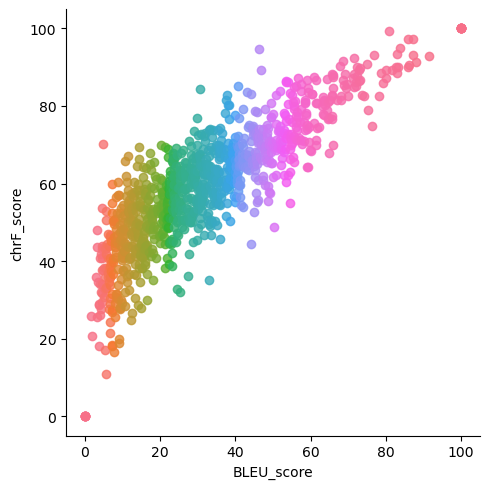

In [40]:
import matplotlib.pyplot as plt
import seaborn as sb
plot4 = sb.lmplot(corpus_df, x='BLEU_score' ,y="chrF_score",hue='BLEU_score',legend = False, fit_reg=False)
plot4.savefig('./BLEU_chrF_corpus.png')

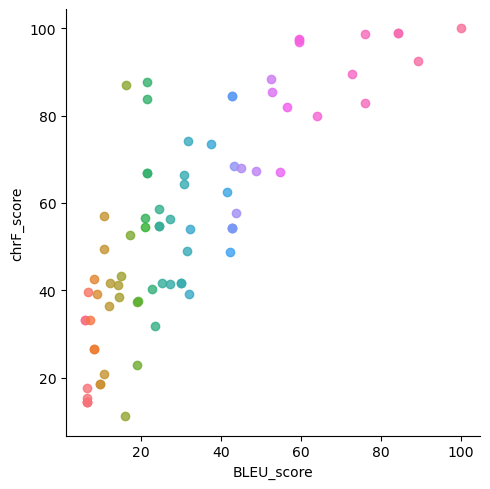

In [41]:
import matplotlib.pyplot as plt
import seaborn as sb
plot5 = sb.lmplot(synthetic_df, x='BLEU_score' ,y="chrF_score",hue='BLEU_score',legend = False, fit_reg=False)
plot5.savefig('./BLEU_chrF_synthetic.png')

In [66]:
worst_translations_df = corpus_df.nsmallest(n=30, columns = ['BLEU_score'])


In [83]:
best_translations_df = corpus_df.nlargest(n=30, columns = ['BLEU_score'])


In [67]:
worst_translations_df = worst_translations_df.reset_index()



In [84]:
best_translations_df = best_translations_df.reset_index()



In [68]:
worst_translations_df

,index,Dutch_Sentence,English_Sentence,Dutch Sentence Length,English Sentence Length,Translated_Dutch,BLEU_score,Llama_Evaluation,chrF_score
0,210,"Die kan wel tegen een stootje, dacht ik.""",,8,1,"""It could be against a stump, I thought"".",0.000000,"{\n ""errors"": [\n {\n ""error_type"": ""...",0.000000
1,408,Dus moeten infrastructuur en architectuur daar...,,10,1,So infrastructure and architecture must also b...,0.000000,"{\n ""errors"": [\n {\n ""error_type"": ""...",0.000000
2,953,Tot begin december verblijft Nigussie in Tervu...,,36,1,"Until the beginning of December, Nigussie stay...",0.000000,"[\n {\n ""error type"": ""Fluency"",\n ""err...",0.000000
3,954,"""In het Ethiopisch Hoogland waar ik vandaan ko...",,26,1,"""In the Ethiopian Hoogland where I come from, ...",0.000000,"{\n ""errors"": [\n {\n ""error_type"": ""...",0.000000
4,970,In december keert Nigussie terug naar Ethiopië...,,21,1,"In December, Nigussie will return to Ethiopia,...",0.000000,"{\n ""errors"": [\n {\n ""error_type"": ""...",0.000000
5,971,Mét de Prijs voor Ontwikkelingssamenwerking op...,,7,1,Mét ⁇ de Prix for Development Cooperation on ...,0.000000,"{\n ""errors"": [\n {\n ""error_type"": ""...",0.000000
6,972,"""Het geeft me voldoening dat ik mijn steentje ...",,34,1,"""It gives me satisfaction that I can contribut...",0.000000,"[\n {\n ""error type"": ""Accuracy"",\n ""er...",0.000000
7,137,Bei dir haben sie wohl das Kind fortgeworfen u...,Bei dir haben sie wohl das Kind fortgeworfen u...,12,25,Did they raise the Kind fortgeworfen and the N...,1.606214,"{\n ""errors"": [\n {\n ""error type"": ""...",25.774284
8,295,Ze wonnen er de hoofdprijs mee van de KVIV-Ing...,"Together, they won first place at the Engineer...",9,17,They won the main prize of the KVIV-Engineersp...,1.777318,"{\n ""errors"": [\n {\n ""error_type"": ""...",20.776939
9,112,"""Degenen die sport en ontwikkelingssamenwerkin...","""Those who wish to couple sport together with ...",12,14,"""In order to connect sports and development co...",2.954001,"{\n ""errors"": [\n {\n ""error_type"": ""...",35.791212


In [88]:
best_translations_df

,index,Dutch_Sentence,English_Sentence,Dutch Sentence Length,English Sentence Length,Translated_Dutch,BLEU_score,Llama_Evaluation,chrF_score
0,99,Hij is één van de redacteurs van het boek Spor...,He is one of the editors of the book Sport and...,12,12,He is one of the editors of the book Sport and...,100.000000,"{\n ""errors"": [\n {\n ""error_type"": ""...",100.000000
1,114,Sport is een gereguleerd conflict.,Sport is a regulated conflict.,5,5,Sport is a regulated conflict.,100.000000,"{\n ""errors"": [\n {\n ""error_type"": ""...",100.000000
2,597,We gaan ervan uit dat een sterkere internation...,We assume that a stronger international positi...,19,16,We assume that a stronger international positi...,100.000000,"{\n ""errors"": [\n {\n ""error_type"": ""...",100.000000
3,613,"Management heeft ook een praktische kant, zoal...","Management also has a practical side, such as ...",8,9,"Management also has a practical side, such as ...",100.000000,"{\n ""errors"": [\n {\n ""error_type"": ""...",100.000000
4,650,Ze zijn het werk van meerdere Napolitaanse kun...,They are the work of many Neapolitan artists.,8,8,They are the work of many Neapolitan artists.,100.000000,"{\n ""errors"": [\n {\n ""error_type"": ""...",100.000000
5,774,"""Het model willen we nu verder patiëntspecifie...","""We want to make the model more patient-specif...",16,16,"""We want to make the model more patient-specif...",100.000000,"{\n ""errors"": [\n {\n ""error_type"": ""...",100.000000
6,801,Synthetische biologie is de biologie van de to...,Synthetic biology is the biology of the future.,8,8,Synthetic biology is the biology of the future.,100.000000,"{\n ""errors"": [\n {\n ""error_type"": ""...",100.000000
7,810,"Stefanie Roberfroid: ""Dr. Coli is een bacterie...","Stefanie Roberfroid: ""Dr. Coli is a self-regul...",10,8,"Stefanie Roberfroid: ""Dr. Coli is a self-regul...",100.000000,"{\n ""errors"": [\n {\n ""error_type"": ""...",100.000000
8,844,Acht jaar slechte beslissingen betekenen niet ...,Eight years of bad decisions do not mean the e...,12,14,Eight years of bad decisions do not mean the e...,100.000000,"{\n ""errors"": [\n {\n ""error_type"": ""...",100.000000
9,156,"""Your brain is so minute, Baldrick, that if a ...","""Your brain is so minute, Baldrick, that if a ...",25,25,"""Your brain is so minute, Baldrick, that if a ...",91.377621,"{\n ""errors"": [\n {\n ""error_type"": ""...",92.992897


In [82]:
i = 0
for index in worst_translations_df.iterrows():
    dutch_sentence = worst_translations_df.loc[i]['Dutch_Sentence']
    reference_sentence = worst_translations_df.loc[i]['English_Sentence']
    translated_sentence = worst_translations_df.loc[i]['Translated_Dutch']
    
    BLEU_score = worst_translations_df.loc[i]['BLEU_score']
    chrF_score = worst_translations_df.loc[i]['chrF_score']
    if BLEU_score>1.61: #1.61 to get rid of a german sentence.
            
        llama_evaluation = worst_translations_df.loc[i]['Llama_Evaluation']
        print(dutch_sentence, BLEU_score, chrF_score)
        print('reference:',reference_sentence,'\ntranslated:',translated_sentence)
        print(llama_evaluation,'\n\n')
    i+=1

Ze wonnen er de hoofdprijs mee van de KVIV-Ingenieursprijzen. 1.7773184466678087 20.776938527363516
reference: Together, they won first place at the Engineering Awards organized by KVIV (Royal Flemish Society of Engineers). 
translated: They won the main prize of the KVIV-Engineersprize.
{
  "errors": [
    {
      "error_type": "Accuracy",
      "error_span_index": {"start": 0, "end": 2},
      "marked_text": "They won the main prize of the KVIV-Engineersprize.",
      "severity": 3
    },
    {
      "error_type": "Terminology",
      "error_span_index": {"start": 10, "end": 25},
      "marked_text": "KVIV-Engineersprize",
      "severity": 4
    }
  ]
} 


"Degenen die sport en ontwikkelingssamenwerking aan elkaar koppelen, mikken op diverse werkingssferen. 2.954001199967652 35.79121190719006
reference: "Those who wish to couple sport together with development work aim at diverse spheres. 
translated: "In order to connect sports and development cooperation with each other, we focus 

In [86]:
i = 0
for index in best_translations_df.iterrows():
    dutch_sentence = best_translations_df.loc[i]['Dutch_Sentence']
    reference_sentence = best_translations_df.loc[i]['English_Sentence']
    translated_sentence = best_translations_df.loc[i]['Translated_Dutch']
    
    BLEU_score = best_translations_df.loc[i]['BLEU_score']
    chrF_score = best_translations_df.loc[i]['chrF_score']
    if BLEU_score>1.61: #1.61 to get rid of a german sentence.
            
        llama_evaluation = best_translations_df.loc[i]['Llama_Evaluation']
        print(dutch_sentence, BLEU_score, chrF_score)
        print('reference:',reference_sentence,'\ntranslated:',translated_sentence)
        print(llama_evaluation,'\n\n')
    i+=1

Hij is één van de redacteurs van het boek Sport and Development. 100.00000000000004 100.0
reference: He is one of the editors of the book Sport and Development. 
translated: He is one of the editors of the book Sport and Development.
{
  "errors": [
    {
      "error_type": "Accuracy",
      "error_span_index": {"start": 0, "end": 4},
      "marked_text": "He is one of the editors",
      "severity": 1
    },
    {
      "error_type": "Terminology",
      "error_span_index": {"start": 5, "end": 17},
      "marked_text": "of the book Sport and Development.",
      "severity": 2
    }
  ]
} 


Sport is een gereguleerd conflict. 100.00000000000004 100.0
reference: Sport is a regulated conflict. 
translated: Sport is a regulated conflict.
{
  "errors": [
    {
      "error_type": "Accuracy",
      "error_span_index": {"start": 2, "end": 3},
      "marked_text": "regulated",
      "severity": 5
    }
  ]
} 


We gaan ervan uit dat een sterkere internationale positie van de Afrikaanse unive

In [77]:
synthetic_df

,Dutch_Sentence,English_Sentence,Dutch Sentence Length,English Sentence Length,Translated_Dutch,BLEU_score,chrF_score,Llama_Evaluation
315,Een appel per dag houdt de arts bezig,An apple a day keeps the doctor away,8,8,One call a day keeps the arts busy.,29.847459,41.658229,"{\n ""errors"": [\n {\n ""error_type"": ""..."
316,Geld is het root van alle kwaad,Money is the root of all evil,7,7,Money is the root of all evil.,84.089642,99.027413,"{\n ""errors"": [\n {\n ""error_type"": ""..."
317,Een lege maag is een slechte raadgever,An empty stomach is not a good advisor,7,8,A foolish man is a bad consultant.,6.567275,14.366278,"{\n ""errors"": [\n {\n ""error_type"": ""..."
318,Een vogel in de hand is beter dan tien in de l...,A bird in the hand is worth two in the bush,12,11,A bird in the hand is better than ten in the air.,42.803206,54.335308,"{\n ""errors"": [\n {\n ""error_type"": ""..."
319,Een wolf in schaapskleren,A wolf in sheeps clothing,4,5,A wolf in sheep's clothing,42.728701,84.593292,"{\n ""errors"": [\n {\n ""error_type"": ""..."
...,...,...,...,...,...,...,...,...
388,Hou nou op met die gekke grapjes! Ze zijn echt...,Stop making those silly jokes! Theyre not funn...,17,15,"Stop with those crazy jokes, they really aren'...",32.160571,53.952176,"{\n ""errors"": [\n {\n ""error_type"": ""..."
389,"Doe maar wat je wilt, ik heb geen zin om te di...","Do what you want, I dont feel like discussing ...",15,11,"Do what you will, I have no desire to discuss ...",14.458925,38.361144,"{\n ""errors"": [\n {\n ""error_type"": ""..."
390,Kun je het raam even dichtdoen? Het is koud bu...,Can you close the window for a moment? Its col...,20,22,It's cold outside and there's wind blowing aro...,12.139459,41.716697,"{\n ""errors"": [\n {\n ""error_type"": ""..."
391,"Bel hem eens op, hij zal nou wel thuis zijn en...","Call him once, hell probably be home by now an...",21,20,"Give him a call, he'll be home soon and I can ...",7.133515,33.254506,"{\n ""errors"": [\n {\n ""error_type"": ""..."


In [99]:
corpus_df.to_pickle('.\Corpora\corpus_final.pkl')
synthetic_df.to_pickle('.\Corpora\sythetic_final.pkl')
worst_translations_df.to_pickle('.\Corpora\worst_corpus_final.pkl')
best_translations_df.to_pickle('.\Corpora\st_corpus_final.pkl')


In [102]:
i = 315
for index in synthetic_df.iterrows():
    dutch_sentence = synthetic_df.loc[i]['Dutch_Sentence']
    reference_sentence = synthetic_df.loc[i]['English_Sentence']
    translated_sentence = synthetic_df.loc[i]['Translated_Dutch']
    
    BLEU_score = synthetic_df.loc[i]['BLEU_score']
    chrF_score = synthetic_df.loc[i]['chrF_score']
    if BLEU_score>1.61: #1.61 to get rid of a german sentence.
            
        llama_evaluation = synthetic_df.loc[i]['Llama_Evaluation']
        print(dutch_sentence, BLEU_score, chrF_score)
        print('reference:',reference_sentence,'\ntranslated:',translated_sentence)
        print(llama_evaluation,'\n\n')
    i+=1

Een appel per dag houdt de arts bezig 29.84745896009822 41.65822927638047
reference: An apple a day keeps the doctor away 
translated: One call a day keeps the arts busy.
{
  "errors": [
    {
      "error_type": "Accuracy",
      "error_span_index": {"start": 0, "end": 4},
      "marked_text": "One call a day keeps the arts busy.",
      "severity": 5
    },
    {
      "error_type": "Terminology",
      "error_span_index": {"start": 7, "end": 11},
      "marked_text": "the arts",
      "severity": 3
    }
  ]
} 


Geld is het root van alle kwaad 84.08964152537145 99.02741284143453
reference: Money is the root of all evil 
translated: Money is the root of all evil.
{
  "errors": [
    {
      "error_type": "Accuracy",
      "error_span_index": {"start": 0, "end": 5},
      "marked_text": "Money is the root of all evil.",
      "severity": 1
    },
    {
      "error_type": "Terminology",
      "error_span_index": {"start": 7, "end": 13},
      "marked_text": "all evil",
      "severit

In [103]:
corpus_df.describe()

,Dutch Sentence Length,English Sentence Length,BLEU_score,chrF_score
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,18.158000,18.381000,32.097873,59.176538
std,8.896527,9.375059,20.113547,16.333597
min,5.000000,1.000000,0.000000,0.000000
25%,12.000000,12.000000,15.593440,49.314491
50%,17.000000,17.000000,29.682933,59.513896
75%,23.000000,23.000000,44.865553,69.219304
max,109.000000,115.000000,100.000000,100.000000


In [104]:
synthetic_df.describe()

,Dutch Sentence Length,English Sentence Length,BLEU_score,chrF_score
count,78.000000,78.000000,78.000000,78.000000
mean,8.576923,8.256410,31.392229,55.432784
std,4.793175,4.619091,22.818143,25.100998
min,3.000000,3.000000,5.934203,11.111111
25%,4.000000,4.000000,12.685380,38.530518
50%,8.000000,8.000000,24.446151,54.335308
75%,12.000000,11.000000,42.803206,74.041548
max,22.000000,23.000000,100.000000,100.000000
